In [1]:
############ Fashion MNIST dataset ###############
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util import y2ind

%matplotlib inline

In [2]:
train = pd.read_csv('/home/t1/machine_learning/datasets/fashion_mnist/fashion-mnist_train.csv')
test = pd.read_csv('/home/t1/machine_learning/datasets/fashion_mnist/fashion-mnist_test.csv')

print 'Train set shape : ',train.shape
print 'Test set shape : ',test.shape

Train set shape :  (60000, 785)
Test set shape :  (10000, 785)


In [3]:
train_labels = train['label'].values
train_data = train.drop('label',axis=1).values.reshape(-1,28,28,1)/255.0

test_labels = test['label'].values
test_data = test.drop('label',axis=1).values.reshape(-1,28,28,1)/255.0
ind_train_labels = y2ind(train_labels)

print 'Train data shape : ',train_data.shape
print 'test data shape : ',test_data.shape
print 'Indicator train labels shape : ',ind_train_labels.shape

Train data shape :  (60000, 28, 28, 1)
test data shape :  (10000, 28, 28, 1)
Indicator train labels shape :  (60000, 10)


label :  2


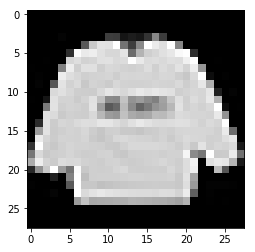

In [4]:
#sample data
image_size = 28
print 'label : ',train_labels[0]
plt.imshow(train_data[0,:].reshape(image_size,image_size),cmap='gray')

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,Flatten,MaxPooling2D

Using TensorFlow backend.


In [6]:
######## CNN Model ###########
model = Sequential()

## 1st Conv and pooling layer
model.add(Convolution2D(5,(5,5),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# 2nd Conv and Pooling layer
model.add(Convolution2D(5,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#flatten the outputs of second pooling layer for fully connected layer
model.add(Flatten())

# 1st dense layer 
model.add(Dense(512,activation='relu'))

#final output layer
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
train_op = model.fit(train_data,ind_train_labels,epochs = 5,verbose=1)

Epoch 1/5
60000/60000 [==============================] - 44s 740us/step - loss: 0.5915 - acc: 0.7834
Epoch 2/5
60000/60000 [==============================] - 56s 929us/step - loss: 0.4207 - acc: 0.8473
Epoch 3/5
60000/60000 [==============================] - 60s 999us/step - loss: 0.3669 - acc: 0.8642
Epoch 4/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.3415 - acc: 0.8737
Epoch 5/5
59680/60000 [============================>.] - ETA: 0s - loss: 0.3217 - acc: 0.88128

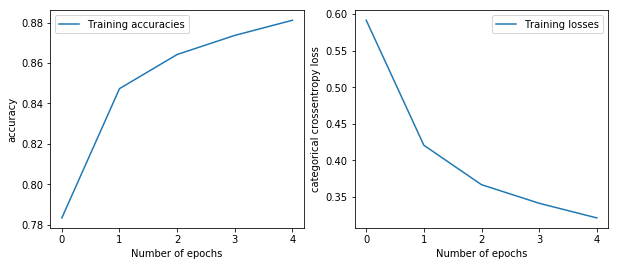

In [14]:
accs = train_op.history['acc']
losses = train_op.history['loss']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(5),accs,label = 'Training accuracies')
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(5),losses,label = 'Training losses')
plt.xlabel('Number of epochs')
plt.ylabel('categorical crossentropy loss')
plt.legend()